<a href="https://colab.research.google.com/github/GMISSAGLIA/GM_PyLab/blob/Main/MITXPRO_CASE3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT xPRO: DSx
Data Science and Big Data Analytics: Making Data-Driven Decisions
Case study 3.1

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving challenger-data.xlsx to challenger-data.xlsx


In [6]:
data = pd.read_excel(r'challenger-data.xlsx')
print ('shape:', data.shape, '\n', 'size:' , data.size, '\n', 'dimensions:', data.ndim)

shape: (120, 3) 
 size: 360 
 dimensions: 2


In [8]:
failures = data.loc[data.Y==1]
no_failures = data.loc[data.Y==0]
failures_freq = failures.X.value_counts()#failures.groupby('X')
no_failures_freq = no_failures.X.value_counts()


In [15]:
print( 'failures_freq: \n ',  failures_freq, '\n \n no_failures_freq: \n',  no_failures_freq)

failures_freq: 
  53    3
75    2
70    2
63    1
58    1
57    1
Name: X, dtype: int64 
 
 no_failures_freq: 
 70    18
67    15
76    10
75     8
80     5
66     5
68     5
69     5
81     5
72     5
73     5
78     5
79     5
63     4
58     4
57     4
53     2
Name: X, dtype: int64


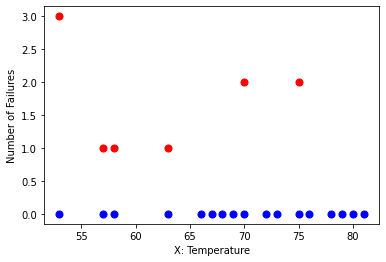

In [17]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.scatter(failures_freq.index, failures_freq, c='red', s=50)
plt.scatter(no_failures_freq.index, np.zeros(len(no_failures_freq)), c='blue', s=50)
plt.xlabel('X: Temperature')
plt.ylabel('Number of Failures')
plt.show()

In [18]:
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
#get the data in correct format
y, X = dmatrices('Y ~ X', data, return_type = 'dataframe')
#build the model
logit = sm.Logit(y, X)
result = logit.fit()
# summarize the model
print (result.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2021   Pseudo R-squ.:                  0.1549
Time:                        08:52:08   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.